In [1]:
import pandas as pd

In [61]:
data = pd.read_csv('played_hour_sample_data.csv')

In [62]:
data.head()

,Outlook,Temperature,Windy,Hours Played
0,Rainy,Hot,0,26
1,Rainy,Hot,1,30
2,Overcast,Hot,0,48
3,Sunny,Mild,0,46
4,Sunny,Cool,0,62


In [4]:
dataset_count = len(data)
dataset_count

10

In [5]:
STD = data['Hours Played'].std()
print(STD)

13.590846592876806


In [6]:
#データを「Outlook」カラムの値に基づき分割する
data1_Out = data[data['Outlook'] =='Rainy']
data2_Out = data[data['Outlook'] =='Overcast']
data3_Out = data[data['Outlook'] =='Sunny']

In [7]:
#P(k)σ(k)を計算するメゾット
def calculatePSTD(df, parent_count):
    
    child_count = len(df)
    P = child_count/parent_count
    S = df['Hours Played'].std()

    return S*P

In [8]:
#P(k)σ(k)を実際に計算
PSTD1_Out = calculatePSTD(data1_Out, dataset_count)
PSTD2_Out = calculatePSTD(data2_Out, dataset_count)
PSTD3_Out = calculatePSTD(data3_Out, dataset_count)

In [9]:
#分割後の標準偏差の合計を求める
STD_Outlook = PSTD1_Out+PSTD2_Out+PSTD3_Out
print(STD_Outlook)

11.039011940466317


In [10]:
#データを「Temperature」カラムの値に基づき分割する
data1_Temp = data[data['Temperature'] =='Hot']
data2_Temp = data[data['Temperature'] =='Mild']
data3_Temp = data[data['Temperature'] =='Cool']

In [11]:
#P(k)σ(k)を実際に計算
PSTD1_Temp = calculatePSTD(data1_Temp, dataset_count)
PSTD2_Temp = calculatePSTD(data2_Temp, dataset_count)
PSTD3_Temp = calculatePSTD(data3_Temp, dataset_count)

In [12]:
#分割後の標準偏差の合計を求める
STD_Temp = PSTD1_Temp+PSTD2_Temp+PSTD3_Temp
print(STD_Temp)

13.887533056603022


In [13]:
#データを「Windy」カラムの値に基づき分割する
data1_Wind = data[data['Windy'] ==0]
data2_Wind = data[data['Windy'] ==1]

In [14]:
#P(k)σ(k)を実際に計算
PSTD1_Wind = calculatePSTD(data1_Wind, dataset_count)
PSTD2_Wind = calculatePSTD(data2_Wind, dataset_count)

In [15]:
STD_Wind = PSTD1_Wind+PSTD2_Wind
print(STD_Wind)

14.238989784044879


In [16]:
#OutookのSDRを求める
SDR = STD - STD_Outlook
print(SDR)

2.5518346524104896


In [17]:
SDR = STD - STD_Temp
print(SDR)

-0.2966864637262159


In [18]:
SDR = STD - STD_Wind
print(SDR)

-0.6481431911680726


In [19]:
def cv_check(df):
    CV = df['Hours Played'].std()/df['Hours Played'].mean()
    if CV < 0.20:
        return True
    else:
        return False

In [21]:
cv_check(data1_Out)

True

In [22]:
cv_check(data2_Out)

True

In [23]:
cv_check(data3_Out)

False

# 実際に分類木を作成する

In [24]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  

In [54]:
X = data.iloc[:,0:3]

In [66]:
data['Outlook'] = data['Outlook'].replace('Sunny', 0)
data['Outlook'] = data['Outlook'].replace('Overcast', 1)
data['Outlook'] = data['Outlook'].replace('Rainy', 2)
data['Temperature'] = data['Temperature'].replace('Hot', 0)
data['Temperature'] = data['Temperature'].replace('Mild', 1)
data['Temperature'] = data['Temperature'].replace('Cool', 2)
data.head()

,Outlook,Temperature,Windy,Hours Played
0,2,0,0,26
1,2,0,1,30
2,1,0,0,48
3,0,1,0,46
4,0,2,0,62


In [68]:
X = data.iloc[:,0:3]
X.head()

,Outlook,Temperature,Windy
0,2,0,0
1,2,0,1
2,1,0,0
3,0,1,0
4,0,2,0


In [69]:
y = data.iloc[:,3:4]
y.head()

,Hours Played
0,26
1,30
2,48
3,46
4,62


In [78]:
# create a regressor object. Max_depth is set as 3
regressor = DecisionTreeRegressor(random_state = 0,max_depth=3)  
  
# fit the regressor with X and Y data 
regressor.fit(X, y) 

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

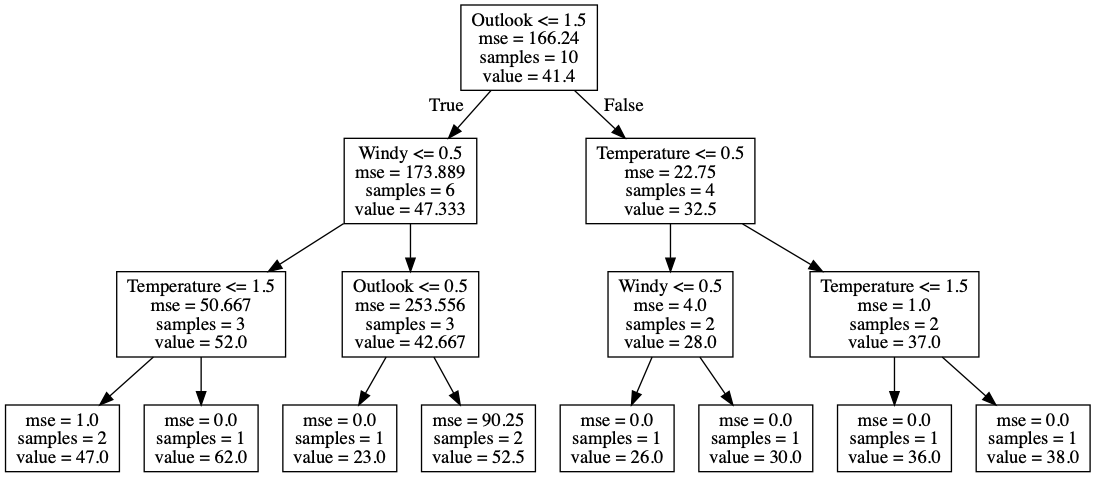

In [79]:
# visualize the regression tree using export_graphviz 
from sklearn.tree import export_graphviz  
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(regressor, out_file =None, 
               feature_names =['Outlook','Temperature','Windy'])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())